**Project Check-in 3**

In [1]:
%pip install --upgrade pip
%pip install scikit-lego
%pip install seaborn
%pip install nbstripout
!nbstripout --install

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
fatal: --local can only be used inside a git repository
Installation failed: not a git repository!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("./dataset.csv")

In [ ]:
# Step 1: Clean Data
# Remove duplicates
df_cleaned = df.drop_duplicates()

df_cleaned.drop(columns=['track_id', 'track_name', 'artists','album_name', 'track_genre', 'time_signature', 'mode', 'explicit', 'key'], inplace=True)
df_cleaned

,Unnamed: 0,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,73,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917
1,1,55,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489
2,2,57,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332
3,3,71,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740
4,4,82,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,21,384999,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995
113996,113996,22,385000,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239
113997,113997,22,271466,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378
113998,113998,41,283893,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960


In [16]:
pca_U, pca_d, pca_V = np.linalg.svd(df_cleaned, full_matrices=False)
prop_var = np.square(pca_d) / sum(np.square(pca_d))
pd.DataFrame(
    {"PC": 1 + np.arange(0, prop_var.shape[0]),
     "variability_explained": prop_var.round(2),
     "cumulative_variability_explained": prop_var.cumsum().round(2)
     }).head(5)

,PC,variability_explained,cumulative_variability_explained
0,1,0.98,0.98
1,2,0.02,1.00
2,3,0.00,1.00
3,4,0.00,1.00
4,5,0.00,1.00


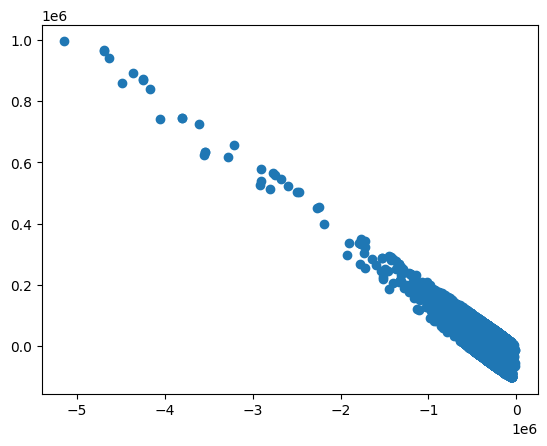

In [19]:
pca_x = df_cleaned @ pca_V.T
pca_x.columns = ["PC" + str(1 + col) for col in pca_x.columns]
plt.scatter(pca_x["PC1"], pca_x["PC2"])